# Sweet n Sour Sentiment on the Street
Georgia Tech Data Science Bootcamp - Cohort 6
Final Project
Team Members:
* Joseph Ayala
* Andrew Behrman
* Michael Fox
* Michael Hankinson

### Regression Analysis

#### This notebook is designed to run a multi-variate regression analysis on the various ticker features and determine which is most influential

In [26]:
import pandas as pd


In [27]:
df = pd.read_csv('../db/final_complete_merged_dataset.csv', sep='|')
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'call_datetime', 'Unnamed: 0_x', 'id',
       'sentiment', 'sentence', 'ticker', 'call_title', 'speaker',
       'call_section', 'vader_sentiment', 'call_date', 'call_time',
       'unique_id', 'base_date', 'next_date', 'base_close', 'base_volume',
       'next_close', 'next_volume', 'Unnamed: 0_y', 'marketCap',
       'percent_change_price', 'percent_change_volume', 'model_results',
       'kmeans_cluster'],
      dtype='object')

In [28]:
df['binary_price_change'] = df['percent_change_price'].apply(lambda x: 1 if (x > 0) else 0)
df['sentiment'] = df['model_results']
df.head()

,Unnamed: 0,Unnamed: 0.1,call_datetime,Unnamed: 0_x,id,sentiment,sentence,ticker,call_title,speaker,...,base_volume,next_close,next_volume,Unnamed: 0_y,marketCap,percent_change_price,percent_change_volume,model_results,kmeans_cluster,binary_price_change
0,0,0,2019-11-01 10:00:00,457,457,3,Good morning and welcome to the Dominion Ener...,D,"Dominion Energy, Inc. (NYSE:D) Q3 2019 Earning...",Operator,...,2424000.0,83.269997,3169600.0,D,67584167936,0.872191,30.759076,3,0,1
1,1,1,2019-11-01 10:00:00,458,458,3,"At this time, each of your lines is in a liste...",D,"Dominion Energy, Inc. (NYSE:D) Q3 2019 Earning...",Operator,...,2424000.0,83.269997,3169600.0,D,67584167936,0.872191,30.759076,3,1,1
2,2,2,2019-11-01 10:00:00,459,459,3,"At the conclusion of today’s presentation, we ...",D,"Dominion Energy, Inc. (NYSE:D) Q3 2019 Earning...",Operator,...,2424000.0,83.269997,3169600.0,D,67584167936,0.872191,30.759076,3,2,1
3,3,3,2019-11-01 10:00:00,460,460,4,[Operator Instructions] I would now like to tu...,D,"Dominion Energy, Inc. (NYSE:D) Q3 2019 Earning...",Operator,...,2424000.0,83.269997,3169600.0,D,67584167936,0.872191,30.759076,4,1,1
4,4,4,2019-11-01 10:00:00,461,461,3,Good morning and welcome.,D,"Dominion Energy, Inc. (NYSE:D) Q3 2019 Earning...",Steven Ridge,...,2424000.0,83.269997,3169600.0,D,67584167936,0.872191,30.759076,3,0,1


In [29]:
df.describe()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0_x,id,sentiment,vader_sentiment,base_close,base_volume,next_close,next_volume,marketCap,percent_change_price,percent_change_volume,model_results,kmeans_cluster,binary_price_change
count,42941.000000,42941.000000,42941.000000,42941.000000,42941.000000,42941.000000,42941.000000,4.294100e+04,42941.000000,4.294100e+04,4.294100e+04,42941.000000,42941.000000,42941.000000,42941.000000,42941.000000
mean,21470.000000,23556.465895,18447.076407,18447.076407,3.077129,0.259800,143.517541,6.102612e+06,139.942650,1.319834e+07,5.101830e+10,-0.341603,98.786692,3.077129,1.053189,0.539415
std,12396.143291,16081.709925,12520.269232,12520.269232,0.418220,0.330205,265.461199,1.140393e+07,246.591195,2.933328e+07,6.092187e+10,5.707717,127.013049,0.418220,1.498334,0.498450
min,0.000000,0.000000,0.000000,0.000000,1.000000,-0.949300,9.070000,2.280000e+05,10.110000,4.135000e+05,5.205218e+09,-20.808657,-30.405860,1.000000,0.000000,0.000000
25%,10735.000000,10735.000000,6440.000000,6440.000000,3.000000,0.000000,42.650002,1.473700e+06,43.680000,2.355400e+06,1.279713e+10,-3.140449,30.741410,3.000000,0.000000,0.000000
50%,21470.000000,21470.000000,17778.000000,17778.000000,3.000000,0.273200,82.730003,2.525500e+06,84.559998,4.400500e+06,2.386513e+10,0.439476,65.650464,3.000000,0.000000,1.000000
75%,32205.000000,32205.000000,29037.000000,29037.000000,3.000000,0.493900,141.029999,6.106800e+06,138.119995,1.070740e+07,5.688201e+10,2.937574,124.076569,3.000000,2.000000,1.000000
max,42940.000000,64976.000000,40712.000000,40712.000000,5.000000,0.993000,2012.089966,7.865600e+07,1849.930054,2.159434e+08,2.962090e+11,13.692753,771.327086,5.000000,4.000000,1.000000


In [30]:
grouped_df = df.groupby(by=['ticker','call_section']).agg({
    'sentiment' : "mean",
    'vader_sentiment': "mean",
    'kmeans_cluster': "mean",  ### FUTURE: Need to figure out how to get better kmeans cluster for group of sentences
    'marketCap': "mean",
    'base_volume': "mean",
    'percent_change_price': "mean",
    'binary_price_change': "mean"
})
#grouped_df = pd.DataFrame((group['sentiment','vader_sentiment','marketCap','base_volume','percent_change_price',
#                                 'binary_price_change']).mean())

grouped_df.head()


sentiment  vader_sentiment  kmeans_cluster  \
ticker call_section                                                       
AAP    answer                 3.090487         0.227533        1.106729   
       operator_instruction   3.136364         0.070109        0.636364   
       presentation           3.139073         0.435914        0.960265   
       question               3.075472         0.132848        1.270440   
ABBV   answer                 3.093117         0.233434        1.056680   

                                marketCap  base_volume  percent_change_price  \
ticker call_section                                                            
AAP    answer                 11265734656    1805500.0             -7.510963   
       operator_instruction   11265734656    1805500.0             -7.510963   
       presentation           11265734656    1805500.0             -7.510963   
       question               11265734656    1805500.0             -7.510963   
ABBV   answer                131067805696   10009400.0              2.765552   

                             binary_price_change  
ticker call_section                               
AAP    answer                                  0  
       operator_instruction                    0  
       presentation                            0  
       question                                0  
ABBV   answer                                  1

In [31]:
grouped_df = grouped_df.reset_index()
grouped_df.head()

,ticker,call_section,sentiment,vader_sentiment,kmeans_cluster,marketCap,base_volume,percent_change_price,binary_price_change
0,AAP,answer,3.090487,0.227533,1.106729,11265734656,1805500.0,-7.510963,0
1,AAP,operator_instruction,3.136364,0.070109,0.636364,11265734656,1805500.0,-7.510963,0
2,AAP,presentation,3.139073,0.435914,0.960265,11265734656,1805500.0,-7.510963,0
3,AAP,question,3.075472,0.132848,1.270440,11265734656,1805500.0,-7.510963,0
4,ABBV,answer,3.093117,0.233434,1.056680,131067805696,10009400.0,2.765552,1


In [32]:
grouped_df.drop(columns='ticker',inplace=True)
grouped_df['call_section_codes'] = grouped_df['call_section'].astype('category').cat.codes
grouped_df.head()

,call_section,sentiment,vader_sentiment,kmeans_cluster,marketCap,base_volume,percent_change_price,binary_price_change,call_section_codes
0,answer,3.090487,0.227533,1.106729,11265734656,1805500.0,-7.510963,0,0
1,operator_instruction,3.136364,0.070109,0.636364,11265734656,1805500.0,-7.510963,0,1
2,presentation,3.139073,0.435914,0.960265,11265734656,1805500.0,-7.510963,0,2
3,question,3.075472,0.132848,1.270440,11265734656,1805500.0,-7.510963,0,3
4,answer,3.093117,0.233434,1.056680,131067805696,10009400.0,2.765552,1,0


In [33]:
grouped_df = pd.get_dummies(grouped_df, columns=['call_section'])
grouped_df.head()

,sentiment,vader_sentiment,kmeans_cluster,marketCap,base_volume,percent_change_price,binary_price_change,call_section_codes,call_section_answer,call_section_operator_instruction,call_section_presentation,call_section_question
0,3.090487,0.227533,1.106729,11265734656,1805500.0,-7.510963,0,0,1,0,0,0
1,3.136364,0.070109,0.636364,11265734656,1805500.0,-7.510963,0,1,0,1,0,0
2,3.139073,0.435914,0.960265,11265734656,1805500.0,-7.510963,0,2,0,0,1,0
3,3.075472,0.132848,1.270440,11265734656,1805500.0,-7.510963,0,3,0,0,0,1
4,3.093117,0.233434,1.056680,131067805696,10009400.0,2.765552,1,0,1,0,0,0


In [34]:
grouped_df['vader_operator'] = grouped_df['call_section_operator_instruction'] * grouped_df['vader_sentiment']
grouped_df['vader_presentation'] = grouped_df['call_section_presentation'] * grouped_df['vader_sentiment']
grouped_df['vader_question'] = grouped_df['call_section_question'] * grouped_df['vader_sentiment']
grouped_df['vader_answer'] = grouped_df['call_section_answer'] * grouped_df['vader_sentiment']

grouped_df['sentiment_operator'] = grouped_df['call_section_operator_instruction'] * grouped_df['sentiment']
grouped_df['sentiment_presentation'] = grouped_df['call_section_presentation'] * grouped_df['sentiment']
grouped_df['sentiment_question'] = grouped_df['call_section_question'] * grouped_df['sentiment']
grouped_df['sentiment_answer'] = grouped_df['call_section_answer'] * grouped_df['sentiment']

grouped_df['kmeans_operator'] = grouped_df['call_section_operator_instruction'] * grouped_df['kmeans_cluster']
grouped_df['kmeans_presentation'] = grouped_df['call_section_presentation'] * grouped_df['kmeans_cluster']
grouped_df['kmeans_question'] = grouped_df['call_section_question'] * grouped_df['kmeans_cluster']
grouped_df['kmeans_answer'] = grouped_df['call_section_answer'] * grouped_df['kmeans_cluster']

grouped_df.head()

,sentiment,vader_sentiment,kmeans_cluster,marketCap,base_volume,percent_change_price,binary_price_change,call_section_codes,call_section_answer,call_section_operator_instruction,...,vader_question,vader_answer,sentiment_operator,sentiment_presentation,sentiment_question,sentiment_answer,kmeans_operator,kmeans_presentation,kmeans_question,kmeans_answer
0,3.090487,0.227533,1.106729,11265734656,1805500.0,-7.510963,0,0,1,0,...,0.000000,0.227533,0.000000,0.000000,0.000000,3.090487,0.000000,0.000000,0.00000,1.106729
1,3.136364,0.070109,0.636364,11265734656,1805500.0,-7.510963,0,1,0,1,...,0.000000,0.000000,3.136364,0.000000,0.000000,0.000000,0.636364,0.000000,0.00000,0.000000
2,3.139073,0.435914,0.960265,11265734656,1805500.0,-7.510963,0,2,0,0,...,0.000000,0.000000,0.000000,3.139073,0.000000,0.000000,0.000000,0.960265,0.00000,0.000000
3,3.075472,0.132848,1.270440,11265734656,1805500.0,-7.510963,0,3,0,0,...,0.132848,0.000000,0.000000,0.000000,3.075472,0.000000,0.000000,0.000000,1.27044,0.000000
4,3.093117,0.233434,1.056680,131067805696,10009400.0,2.765552,1,0,1,0,...,0.000000,0.233434,0.000000,0.000000,0.000000,3.093117,0.000000,0.000000,0.00000,1.056680


In [35]:
grouped_df.describe()

,sentiment,vader_sentiment,kmeans_cluster,marketCap,base_volume,percent_change_price,binary_price_change,call_section_codes,call_section_answer,call_section_operator_instruction,...,vader_question,vader_answer,sentiment_operator,sentiment_presentation,sentiment_question,sentiment_answer,kmeans_operator,kmeans_presentation,kmeans_question,kmeans_answer
count,325.000000,325.000000,325.000000,3.250000e+02,3.250000e+02,325.000000,325.000000,325.000000,325.000000,325.000000,...,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000
mean,3.066220,0.235768,1.057826,4.877430e+10,5.659208e+06,-0.177755,0.550769,1.501538,0.249231,0.249231,...,0.060768,0.061606,0.756170,0.776345,0.763557,0.770149,0.262132,0.256281,0.279532,0.259880
std,0.047050,0.080048,0.191062,5.924841e+10,1.025177e+07,5.685890,0.498183,1.118378,0.433235,0.433235,...,0.108834,0.110976,1.314744,1.338650,1.327411,1.338833,0.481035,0.445953,0.491775,0.453771
min,2.884615,0.053386,0.142857,5.205218e+09,2.280000e+05,-20.808657,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.037383,0.180026,0.962500,1.233534e+10,1.473700e+06,-2.840792,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.070707,0.236975,1.056680,2.355240e+10,2.525500e+06,0.580556,1.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.095238,0.295556,1.155844,5.599563e+10,6.038700e+06,3.042750,1.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,2.985816,0.000000,0.000000,0.000000,0.747475,0.000000,0.000000
max,3.214286,0.435914,1.958333,2.962090e+11,7.865600e+07,13.692753,1.000000,3.000000,1.000000,1.000000,...,0.353182,0.401884,3.176471,3.214286,3.157143,3.190476,1.958333,1.326733,1.468254,1.242775


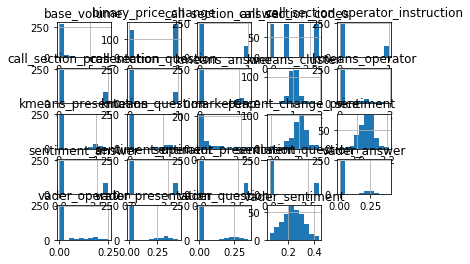

In [36]:
import pylab as pl
grouped_df.hist()
pl.show()

In [37]:
grouped_df.head()

,sentiment,vader_sentiment,kmeans_cluster,marketCap,base_volume,percent_change_price,binary_price_change,call_section_codes,call_section_answer,call_section_operator_instruction,...,vader_question,vader_answer,sentiment_operator,sentiment_presentation,sentiment_question,sentiment_answer,kmeans_operator,kmeans_presentation,kmeans_question,kmeans_answer
0,3.090487,0.227533,1.106729,11265734656,1805500.0,-7.510963,0,0,1,0,...,0.000000,0.227533,0.000000,0.000000,0.000000,3.090487,0.000000,0.000000,0.00000,1.106729
1,3.136364,0.070109,0.636364,11265734656,1805500.0,-7.510963,0,1,0,1,...,0.000000,0.000000,3.136364,0.000000,0.000000,0.000000,0.636364,0.000000,0.00000,0.000000
2,3.139073,0.435914,0.960265,11265734656,1805500.0,-7.510963,0,2,0,0,...,0.000000,0.000000,0.000000,3.139073,0.000000,0.000000,0.000000,0.960265,0.00000,0.000000
3,3.075472,0.132848,1.270440,11265734656,1805500.0,-7.510963,0,3,0,0,...,0.132848,0.000000,0.000000,0.000000,3.075472,0.000000,0.000000,0.000000,1.27044,0.000000
4,3.093117,0.233434,1.056680,131067805696,10009400.0,2.765552,1,0,1,0,...,0.000000,0.233434,0.000000,0.000000,0.000000,3.093117,0.000000,0.000000,0.00000,1.056680


In [43]:
from pandas import DataFrame
from sklearn import linear_model
# train test split
from sklearn.model_selection import train_test_split

X_all = grouped_df.drop(columns=['vader_sentiment','kmeans_cluster','sentiment','percent_change_price','binary_price_change',
                            'call_section_answer','call_section_operator_instruction','call_section_presentation',
                            'vader_sentiment',
                        #   'vader_question', 'vader_answer','vader_operator','vader_presentation',
                        #   'sentiment_question', 'sentiment_answer','sentiment_operator','sentiment_presentation',
                        #    'kmeans_question', 'kmeans_answer','kmeans_operator','kmeans_presentation',
                        #     'base_volume','marketCap',
                             'call_section_codes',
                            'call_section_question']) # here we have variables for multiple regression. 
X_vader = grouped_df.drop(columns=['vader_sentiment','kmeans_cluster','sentiment','percent_change_price','binary_price_change',
                            'call_section_answer','call_section_operator_instruction','call_section_presentation',
                            'vader_sentiment',
                         #  'vader_question', 'vader_answer','vader_operator','vader_presentation',
                           'sentiment_question', 'sentiment_answer','sentiment_operator','sentiment_presentation',
                            'kmeans_question', 'kmeans_answer','kmeans_operator','kmeans_presentation',
                             'base_volume','marketCap',
                             'call_section_codes',
                            'call_section_question']) # here we have variables for multiple regression. 
X_sweet = grouped_df.drop(columns=['vader_sentiment','kmeans_cluster','sentiment','percent_change_price','binary_price_change',
                            'call_section_answer','call_section_operator_instruction','call_section_presentation',
                            'vader_sentiment',
                           'vader_question', 'vader_answer','vader_operator','vader_presentation',
                        #   'sentiment_question', 'sentiment_answer','sentiment_operator','sentiment_presentation',
                            'kmeans_question', 'kmeans_answer','kmeans_operator','kmeans_presentation',
                             'base_volume','marketCap',
                             'call_section_codes',
                            'call_section_question']) # here we have variables for multiple regression. 
X_kmeans = grouped_df.drop(columns=['vader_sentiment','kmeans_cluster','sentiment','percent_change_price','binary_price_change',
                            'call_section_answer','call_section_operator_instruction','call_section_presentation',
                            'vader_sentiment',
                           'vader_question', 'vader_answer','vader_operator','vader_presentation',
                           'sentiment_question', 'sentiment_answer','sentiment_operator','sentiment_presentation',
                        #    'kmeans_question', 'kmeans_answer','kmeans_operator','kmeans_presentation',
                             'base_volume','marketCap',
                             'call_section_codes',
                            'call_section_question']) # here we have variables for multiple regression. 
X_mkt = grouped_df.drop(columns=['vader_sentiment','kmeans_cluster','sentiment','percent_change_price','binary_price_change',
                            'call_section_answer','call_section_operator_instruction','call_section_presentation',
                            'vader_sentiment',
                           'vader_question', 'vader_answer','vader_operator','vader_presentation',
                           'sentiment_question', 'sentiment_answer','sentiment_operator','sentiment_presentation',
                            'kmeans_question', 'kmeans_answer','kmeans_operator','kmeans_presentation',
                        #     'base_volume','marketCap',
                             'call_section_codes',
                            'call_section_question']) # here we have variables for multiple regression. 
X = [X_all, X_vader, X_sweet, X_kmeans, X_mkt]
#Y = grouped_df['percent_change_price']
Y = grouped_df['binary_price_change']

for x_group in X:
    
    X_train, X_test, y_train, y_test = train_test_split(x_group, Y, random_state=1)

    # with sklearn
    #regr = linear_model.LinearRegression()
    regr = linear_model.LogisticRegression()
    regr.fit(X_train, y_train)

    print('*****')
    print('sklearn results:')
    print('Intercept: \n', regr.intercept_)
    print('Coefficients: \n', regr.coef_)
    print('*****')
    print(f'Logistic Regression Accuracy: {regr.score(X_test,y_test)}')


*****
sklearn results:
Intercept: 
 [-3.05869831e-23]
Coefficients: 
 [[ 5.10917813e-12  8.60451585e-16  5.37482921e-24 -1.38926668e-23
  -2.42669196e-24 -1.35852747e-24  1.03491283e-22 -1.22103228e-22
  -4.90761242e-23 -2.73556571e-23  8.26735064e-23 -4.19334454e-23
  -2.65662548e-23 -8.04075649e-24]]
*****
Logistic Regression Accuracy: 0.6219512195121951
*****
sklearn results:
Intercept: 
 [0.12430267]
Coefficients: 
 [[ 0.35827403 -0.43274174 -0.02155559 -0.02835151]]
*****
Logistic Regression Accuracy: 0.5365853658536586
*****
sklearn results:
Intercept: 
 [0.02351349]
Coefficients: 
 [[ 0.09839932 -0.03056052  0.0148519   0.021891  ]]
*****
Logistic Regression Accuracy: 0.5
*****
sklearn results:
Intercept: 
 [-0.32808749]
Coefficients: 
 [[0.73670815 0.22679155 0.2960592  0.38455357]]
*****
Logistic Regression Accuracy: 0.43902439024390244
*****
sklearn results:
Intercept: 
 [-3.05869831e-23]
Coefficients: 
 [[5.10917813e-12 8.60451585e-16]]
*****
Logistic Regression Accuracy: 0.

/Users/i817245/anaconda3/envs/gtfinalproj/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/i817245/anaconda3/envs/gtfinalproj/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/i817245/anaconda3/envs/gtfinalproj/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/i817245/anaconda3/envs/gtfinalproj/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/i817245/anaconda3/envs/gtfinalproj/lib/python3.6/site-package

In [44]:
import statsmodels.api as sm

for x_group in X:
    X_train, X_test, y_train, y_test = train_test_split(x_group, Y, random_state=1)
    logit_model=sm.Logit(y_train, X_train)
    result=logit_model.fit()
    print('*****')

    print(result.summary2())


Optimization terminated successfully.
         Current function value: 0.644066
         Iterations 6
*****
                            Results: Logit
Model:                 Logit                Pseudo R-squared:  0.069   
Dependent Variable:    binary_price_change  AIC:               341.0161
Date:                  2019-11-19 04:22     BIC:               389.9190
No. Observations:      243                  Log-Likelihood:    -156.51 
Df Model:              13                   LL-Null:           -168.09 
Df Residuals:          229                  LLR p-value:       0.039823
Converged:             1.0000               Scale:             1.0000  
No. Iterations:        6.0000                                          
-----------------------------------------------------------------------
                        Coef.  Std.Err.    z    P>|z|   [0.025   0.975]
-----------------------------------------------------------------------
marketCap               0.0000   0.0000  1.8907 0.0587  -

In [46]:
for x_group in X:
    X_train, X_test, y_train, y_test = train_test_split(x_group, Y, random_state=1)

    # try random forest
    from sklearn.ensemble import RandomForestClassifier

    # Instantiate model with 500 decision trees
    rf = RandomForestClassifier(n_estimators = 200, random_state = 1)

    # Train the model on training data
    rf.fit(X_train, y_train)
    
    print('*****')
    print('Random Forest Accuracy of Predicting Positive/Negative price Change: ')
    print(rf.score(X_test, y_test))
    
    feature_importances = zip(X_test.columns, rf.feature_importances_)
    sorted_features = sorted(feature_importances, key=lambda x: x[1],reverse=True)
    print('*****')
    print(sorted_features)

*****
Random Forest Accuracy of Predicting Positive/Negative price Change: 
0.6219512195121951
*****
[('marketCap', 0.22376904820405444), ('base_volume', 0.22249169317004955), ('kmeans_operator', 0.06080667063075558), ('vader_question', 0.052554920931197915), ('kmeans_answer', 0.05043795381818695), ('vader_answer', 0.04734908114710394), ('vader_operator', 0.046522448317974495), ('kmeans_presentation', 0.046151802663329855), ('vader_presentation', 0.045825563913759734), ('sentiment_answer', 0.045184968219590574), ('kmeans_question', 0.04367470453721931), ('sentiment_presentation', 0.0414840980887597), ('sentiment_question', 0.0373346960105945), ('sentiment_operator', 0.036412350347423496)]
*****
Random Forest Accuracy of Predicting Positive/Negative price Change: 
0.524390243902439
*****
[('vader_answer', 0.2680924453387966), ('vader_operator', 0.25577519564965706), ('vader_question', 0.24108884635990177), ('vader_presentation', 0.23504351265164464)]
*****
Random Forest Accuracy of Pred